# Use Human-in-the-Loop to Improve Your Data Science Copilot Results

### Free Generative AI Data Science Workshop

If you want to learn how to build AI Agents that perform Data Science, Business Intelligence, Churn Modeling, Time Series Forecasting, and more, [register for my next free AI for Data Scientists workshop here.](https://learn.business-science.io/ai-register)


# Table of Contents

1. [Introduction](#introduction)
2. [What is Human-in-the-Loop?](#what-is-human-in-the-loop)
3. [What is Data Science Copilot?](#what-is-data-science-copilot)
4. [Example: Using Human-in-the-Loop to Improve Data Science Copilot Results for Feature Engineering](#example-using-human-in-the-loop-to-improve-data-science-copilot-results-for-feature-engineering)
    1. [Load Libraries](#load-libraries)
    2. [Setup AI and Logging](#setup-ai-and-logging)
    3. [Load a Dataset](#load-a-dataset)
    4. [Create The Agent](#create-the-agent)
    5. [Invoke the Feature Engineering Agent with Human-In-The-Loop](#invoke-the-feature-engineering-agent-with-human-in-the-loop)
    6. [Human Review](#human-review)
    7. [Respond to eliminate conversion of Boolean values](#respond-to-eliminate-conversion-of-boolean-values)
    8. [Re-Review](#re-review)
    9. [Accept the modifications and proceed with the execution](#accept-the-modifications-and-proceed-with-the-execution)
5. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

# Introduction

### What is Human-in-the-Loop?

Human-in-the-Loop is a concept where humans are involved in the decision-making process of AI models. The idea is that humans can provide feedback to AI models to improve their performance. This is especially useful in the case of AI models that are not perfect and need human intervention to improve their performance.

### What is Data Science Copilot (and how does Human-in-the-Loop Help)?

Data Science Copilot is a tool that helps data scientists write code faster and more efficiently. It is an AI-powered tool that provides code suggestions and auto-completion for data science tasks. Data Science Copilot can help data scientists complete common data science tasks faster.

**Human-in-the-Loop gives Data Scientists an opportunity to review the AI's plan before it executes code** to process the data or create machine learning models. This is important because the AI may not always provide the best suggestions, and human intervention can help improve the results.


## Example: Using Human-in-the-Loop to Improve Data Science Copilot Results for Feature Engineering

In this example, we will use Human-in-the-Loop to improve the results of Data Science Copilot for feature engineering. Feature engineering is an important step in the data science process, where we create new features and process existing features in data to improve the performance of machine learning models.

### Load Libraries

In [1]:
from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import FeatureEngineeringAgent

from langgraph.types import Command

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fd640735810>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7fd688d00100>, root_client=<openai.OpenAI object at 0x7fd688cb9120>, root_async_client=<openai.AsyncOpenAI object at 0x7fd640735840>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent

Run this code to create the agent with `FeatureEngineeringAgent()`.

**Important:** In this step we will set `human_in_the_loop=True` to enable human-in-the-loop. This will allow us to review the AI's plan before it executes the code.

Notice that the agent's graph now includes a new node called "Human Review". This node represents the step where the human reviews the AI's plan before it executes the code.

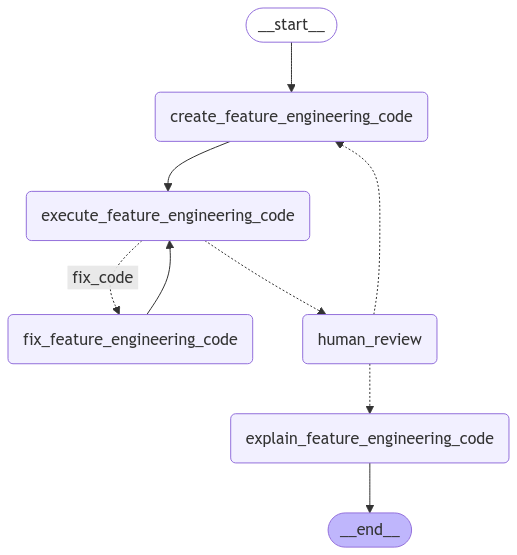

In [4]:
feature_engineering_agent = FeatureEngineeringAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH, 
    human_in_the_loop=True,
    bypass_recommended_steps=True,
    bypass_explain_code=False,
)

feature_engineering_agent

### Invoke the Feature Engineering Agent with Human-In-The-Loop

In [5]:
# Invoke the Feature Engineering Agent with Human-In-The-Loop
config = {"configurable": {"thread_id": "1"}}

feature_engineering_agent.invoke(
    user_instructions="Please perform feature engineering on the dataset.",
    target_variable="Churn",
    data_raw=df,
    max_retries=3,
    retry_count=0,
    config=config,
)

---FEATURE ENGINEERING AGENT----
    * CREATE FEATURE ENGINEERING CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/feature_engineer.py
    * EXECUTING AGENT CODE
list.remove(x): x not in list
    * FIX AGENT CODE
      retry_count:0
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/feature_engineer.py
    * EXECUTING AGENT CODE
    * HUMAN REVIEW


The agent pauses at "HUMAN REVIEW" node. The agent is waiting for the human to provide the required information.

This is how to perform the review:

### Expose the AI's Plan from the interruped state

First, lets expose the AI's feature engineering plan by running the following code:

In [6]:
# Human Review
state = feature_engineering_agent._compiled_graph.get_state(config=config)
pprint(state.tasks[-1].interrupts[-1].value)

("Are the following feature engineering instructions correct? (Answer 'yes' or "
 'provide modifications)\n'
 '\n'
 '\n'
 '```# Disclaimer: This function was generated by AI. Please review before '
 'using.\n'
 '# Agent Name: feature_engineering_agent\n'
 '# Time Created: 2025-01-10 00:59:08\n'
 '\n'
 'def feature_engineer(data_raw):\n'
 '    import pandas as pd\n'
 '    import numpy as np\n'
 '\n'
 '\n'
 '    # Copy the original dataframe to avoid modifying it directly\n'
 '    data = data_raw.copy()\n'
 '\n'
 "    # Convert 'TotalCharges' to numeric, forcing errors to NaN (although "
 "it's stated there are no missing values)\n"
 "    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], "
 "errors='coerce')\n"
 '\n'
 "    # Convert target variable 'Churn' to binary (0/1)\n"
 "    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})\n"
 '\n'
 '    # Encode categorical variables using one-hot encoding\n'
 '    categorical_cols = '
 "data.select_dtypes(include=['object']).column

We can either respond "Yes" if the plan looks good or we can request modifications. If we respond "Yes" the agent will continue to execute the code. If we request modifications, the agent will go back to the recommend feature engineering steps node and revise the plan according to your instructions.

### Let's respond requesting to skip conversion of Boolean values to integers. 

We'll use `Command()` to `resume` the agent with our request to skip the conversion of Boolean values to integers.. 

In [7]:
# Respond to eliminate coversion of Boolean values

feature_engineering_agent._compiled_graph.invoke(Command(resume="Don't convert Boolean values"), config=config)

    * HUMAN REVIEW
---FEATURE ENGINEERING AGENT----
    * CREATE FEATURE ENGINEERING CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/feature_engineer.py
    * EXECUTING AGENT CODE
    * HUMAN REVIEW


{'messages': [],
 'user_instructions': "Please perform feature engineering on the dataset.Modifications: \nDon't convert Boolean values",
 'data_raw': {'customerID': {0: '7590-VHVEG',
   1: '5575-GNVDE',
   2: '3668-QPYBK',
   3: '7795-CFOCW',
   4: '9237-HQITU',
   5: '9305-CDSKC',
   6: '1452-KIOVK',
   7: '6713-OKOMC',
   8: '7892-POOKP',
   9: '6388-TABGU',
   10: '9763-GRSKD',
   11: '7469-LKBCI',
   12: '8091-TTVAX',
   13: '0280-XJGEX',
   14: '5129-JLPIS',
   15: '3655-SNQYZ',
   16: '8191-XWSZG',
   17: '9959-WOFKT',
   18: '4190-MFLUW',
   19: '4183-MYFRB',
   20: '8779-QRDMV',
   21: '1680-VDCWW',
   22: '1066-JKSGK',
   23: '3638-WEABW',
   24: '6322-HRPFA',
   25: '6865-JZNKO',
   26: '6467-CHFZW',
   27: '8665-UTDHZ',
   28: '5248-YGIJN',
   29: '8773-HHUOZ',
   30: '3841-NFECX',
   31: '4929-XIHVW',
   32: '6827-IEAUQ',
   33: '7310-EGVHZ',
   34: '3413-BMNZE',
   35: '6234-RAAPL',
   36: '6047-YHPVI',
   37: '6572-ADKRS',
   38: '5380-WJKOV',
   39: '8168-UQWWF',
   40:

The Feature Engineering Agent has went back to the "Recommend Feature Engineering Steps" node and revised the plan according to our instructions.

We can review the revised plan to make sure our request was implemented correctly.

In [8]:
# Re-Review: Now Booleans will not be converted
state = feature_engineering_agent._compiled_graph.get_state(config=config)
pprint(state.tasks[-1].interrupts[-1].value)

("Are the following feature engineering instructions correct? (Answer 'yes' or "
 'provide modifications)\n'
 '\n'
 '\n'
 '```# Disclaimer: This function was generated by AI. Please review before '
 'using.\n'
 '# Agent Name: feature_engineering_agent\n'
 '# Time Created: 2025-01-10 01:00:19\n'
 '\n'
 'def feature_engineer(data_raw):\n'
 '    import pandas as pd\n'
 '    import numpy as np\n'
 '\n'
 '\n'
 '    # Create a copy of the raw data\n'
 '    data = data_raw.copy()\n'
 '\n'
 "    # Convert 'TotalCharges' to numeric, forcing errors to NaN\n"
 "    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], "
 "errors='coerce')\n"
 '\n'
 '    # Handle missing values (if any, although the summary indicates none)\n'
 '    data.fillna(0, inplace=True)\n'
 '\n'
 '    # Convert categorical variables to numerical using one-hot encoding\n'
 '    categorical_features = '
 "data.select_dtypes(include=['object']).columns.tolist()\n"
 "    categorical_features.remove('customerID')  # Exclude

We can see that the agent is now skipping the conversion of Boolean values to integers per user instructions.

### Accept the modifications and proceed with the execution

In [9]:
# Accept modifications to feature engineering instructions
response = feature_engineering_agent._compiled_graph.invoke(Command(resume="Yes"), config=config)

# Evalualte the response
pd.DataFrame(response['data_engineered'])

    * HUMAN REVIEW
    * EXPLAIN AGENT CODE


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


The final data set has been transformed. We can see that Booleans were left in and not converted to integers.

### Free Generative AI Data Science Workshop

If you want to learn how to build AI Agents that perform Data Science, Business Intelligence, Churn Modeling, Time Series Forecasting, and more, [register for my next free AI for Data Scientists workshop here.](https://learn.business-science.io/ai-register)